In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import numpy as np
from utils import *


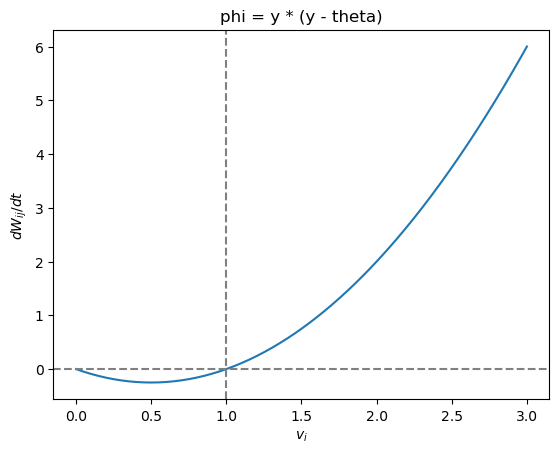

In [4]:

theta = 1.0  # example threshold
y = np.linspace(0, 3*theta, 300)
phi =  y * (y - theta)

plt.plot(y, phi)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(theta, color='grey', linestyle='--')
plt.xlabel('$v_i$')
plt.ylabel('$dW_{ij}/dt$')
plt.title('phi = y * (y - theta)')
plt.show()


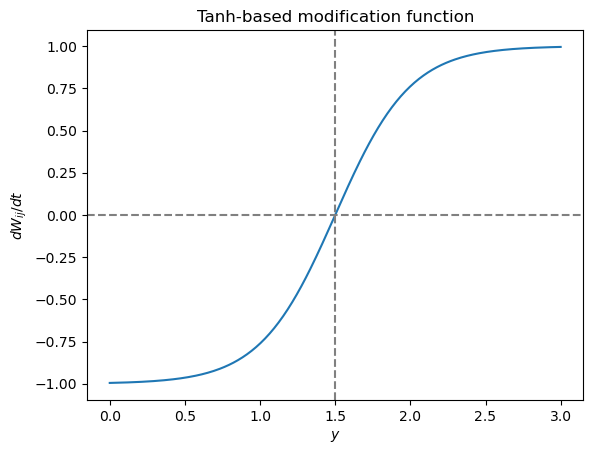

In [23]:
def plasticity_tanh(vi, vtheta, slope):
    return np.tanh(slope * (vi - vtheta))

# Example usage
vtheta = 1.5
slope = 2.0

theta = 1.0  # example threshold
y = np.linspace(0, 3*theta, 300)

dw = plasticity_tanh(y, vtheta, slope)


plt.figure()
plt.plot(y, dw)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(vtheta, color='grey', linestyle='--')

plt.xlabel('$y$')
plt.ylabel('$dW_{ij}/dt$')
plt.title('Tanh-based modification function')
plt.show()


1


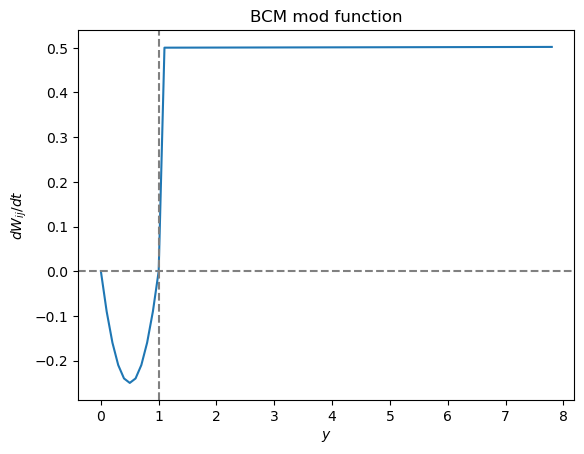

In [24]:
# mod func
# Creating x axis with range and y axis with Sine
# Function for Plotting Sine Graph

def sig(x):
 return 1/(1 + np.exp(-x))


y = np.arange(0, 2.5*np.pi, 0.1)

freq = 0.001
thresh = 1
print(thresh)

#phi = lambda x: - np.sin(freq * x) if x > thresh else sig(x)
#phi = np.where(y < thresh, -np.sin( (1/thresh) * y), sig(freq*y))
phi = np.where(y <= thresh,  y * (y - theta), sig(freq*y))

plt.plot(y, phi)

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(thresh, color='grey', linestyle='--')
plt.xlabel('$y$')
plt.ylabel('$dW_{ij}/dt$')
plt.title('BCM mod function')
plt.show()

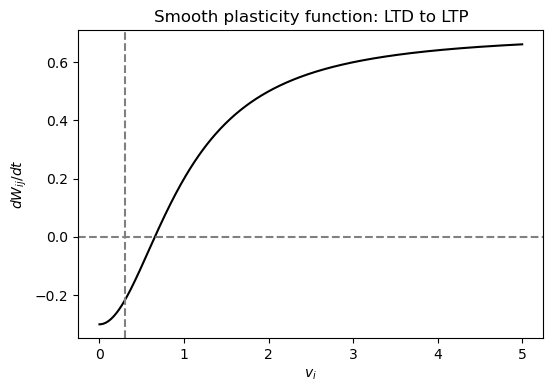

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def plasticity_function(vi, k, alpha):
    return (vi**2) / (vi**2 + k**2) - alpha

# Parameters
k = 1.0
alpha = 0.3  # shift to ensure LTD at low vi and LTP at high vi

vi = np.linspace(0, 5, 500)
dw = plasticity_function(vi, k, alpha)

# Plot
plt.figure(figsize=(6,4))
plt.plot(vi, dw, color='black')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(alpha, color='grey', linestyle='--')

plt.xlabel('$v_i$')
plt.ylabel('$dW_{ij}/dt$')
plt.title('Smooth plasticity function: LTD to LTP')
plt.show()
